# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext

In [2]:
import pyspark.sql.functions as F

In [3]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [4]:
# from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [5]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [6]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168550892|    P|23491655|2017-03-30|
|168549788|    P|  295469|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548101|    P| 6913185|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168551579|    P| 8762277|2017-03-30|
|168551085|    P|23491653|2017-03-30|
|168551524|    P| 6635279|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550949|    P|  360750|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [7]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [8]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168550892|    P|23491655|2017-03-30|
|168549788|    P|  295469|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548101|    P| 6913185|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168551579|    P| 8762277|2017-03-30|
|168551085|    P|23491653|2017-03-30|
|168551524|    P| 6635279|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550949|    P|  360750|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [9]:
# simple count rows
df.count()

5129851

In [10]:
# select operation, count distinct rows
df.select('uid').distinct().count()

53320

In [11]:
# group by aggregation
df.groupBy('event').count().show()

+-----+-------+
|event|  count|
+-----+-------+
|    D| 555004|
|    S| 734938|
|    P|3839909|
+-----+-------+



In [12]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+-------+--------+
|event|  count| max_uid|
+-----+-------+--------+
|    D| 555004|99725077|
|    S| 734938|99725077|
|    P|3839909|99725077|
+-----+-------+--------+



In [13]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 29674|
|2017-04-01|    P|480444|
|2017-04-01|    S| 31715|
|2017-04-02|    D| 24539|
|2017-04-02|    P|433528|
|2017-04-02|    S| 30357|
|2017-04-03|    D| 20263|
|2017-04-03|    P|245538|
|2017-04-03|    S| 26985|
|2017-04-04|    D| 21177|
|2017-04-04|    P|373471|
|2017-04-04|    S| 23548|
|2017-04-05|    D| 14980|
|2017-04-05|    P|296242|
|2017-04-05|    S| 19261|
+----------+-----+------+



In [14]:
date_count = df.groupBy('date').count().toPandas()

(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

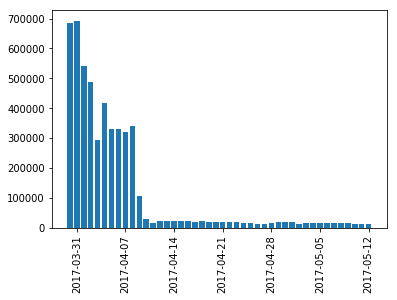

In [15]:
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [16]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

('label window:', datetime.date(2017, 4, 29), '~', datetime.date(2017, 5, 12), 'days:', 14)
('feature window:', datetime.date(2017, 3, 30), '~', datetime.date(2017, 4, 28), 'days:', 30)


In [17]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [18]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [19]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|40666|
|    0|12654|
+-----+-----+



# Feature generation

In [20]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [21]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [22]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [23]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167570402|            1|
|168410657|            6|
|168493545|            5|
|168393114|            2|
|168899043|           11|
+---------+-------------+
only showing top 5 rows



In [24]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [25]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [26]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [27]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|168028443|            2|            5|           13|            13|            17|
|167806314|            0|            1|            6|             8|            32|
|167742880|            0|            0|            0|             0|            11|
|167909274|            0|            0|            0|             0|            29|
|167955727|            9|            9|            9|            33|            70|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [28]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [29]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [ ]:
# defined as days from last event
# can generate one feature for each type of event


### Profile features

In [30]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168550892|    ar|23491655|2017-03-30|      254|        254|
|168549788|    ip|  295469|2017-03-30|       16|        242|
|168532580|    ar|21762903|2017-03-30|       67|        137|
|168543026|    ar| 6623026|2017-03-30|        0|          0|
|168532580|    ar|21762903|2017-03-30|       67|        137|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [31]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [32]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|46676|
|    ip| 6659|
+------+-----+



In [33]:
# check if one user has two devices
df_profile_tmp.count()

53335

In [34]:
df_profile_tmp.distinct().count()

53335

In [35]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 6659|
|          2|46676|
+-----------+-----+



In [36]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 6659|
|          2|46676|
+-----------+-----+



### Total play time features

In [ ]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)


### Fancier frequency features

In [ ]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)


# Form training data

In [37]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [38]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [39]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [40]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)